<h1 style="text-align:center">
    Movies
</h1>

<br>

<font color="darkblue">

<h3 style="text-align:center">
    José D'Orazio De Abreu
</h3>
    
<h3 style="text-align:center">
    30/10/2024
</h3>

<hr>

# Introducción

<br>

En este proyecto se desarrolla en Python un análisis básico de datos sobre películas de cine de IMDB.
El set de datos que vamos a usar inicialmente se encuentra en la siguiente página:

https://www.kaggle.com/datasets/carolzhangdc/imdb-5000-movie-dataset

En ella puede encontrarse información más detallada, así como una descripción precisa de cada columna.

<font color="green">
Seguidamente, te toca a ti hacer una breve introducción, completando el fragmento de letra en azul y desarrollándolo a tu antojo. Suprime después este fragmento en verde.
</font>

<br>

Se plantean los apartados iniciales para su resolución *sin usar la libreria pandas*. Esto se propone así para forzar a practicar con las técnicas, herramientas y conceptos básicos de Python. Más adelante, hay otros apartados propuestos para su resolución con esta librería y otras.

<br>

<font color="darkblue">
A partir de los datos proporcionados, he conseguido ... pero no he podido ...

<br>

Aunque al final de este notebook detallaré la calificación que calculo honestamente, globalmente, siguiendo las puntuaciones que se asigna a cada apartado, diría que he obtenido una nota de *** sobre 10.
</font>

<br>

<font color="green">
Completa tus datos personales en la cabecera, bajo el rótulo inicial. Completa también el breve apartado anterior, con texto  azul, y pon en azul todos los comentarios tuyos, dejando en negro los míos, del enunciado. También, suprime los fragmentos en verde, como éste, que son indicaciones pero que, una vez atendidas, deben desaparecer de la solución que entregas.
</font>

|# Datos de partida

(**Nota previa:** hasta el apartado específico de dataframes, se deben desarrollar las soluciones a los ejercicios propuestos sin usar la librería `pandas`, justamente para obligar a practicar con conceptos básicos de Python.)

Nuestra tabla de datos es el archivo de texto `movie_data.csv` que se encuentra en la carpeta `data_in`, y puede verse así con cualquier editor:

<br>

<center>
    <img src="./images/texto.png" width="100%">
</center>

La primera fila es la cabecera.
Esta fila cabecera contiene los nombres de los campos, separados por comas.
Yo la he marcado en azul para distinguirla fácilmente de las demás filas, que contienen los datos propiamente dichos,
esto es, los valores de dichos campos, consignando los datos de cada película en cada línea.

Si abrimos esta tabla con *excell* (importar datos csv con el separador `,`), vemos cada dato en una celda.

<br>

<center>
    <img src="./images/csv_1.png" width="100%">
</center>

<br>

Mostramos la hoja excell en dos imágenes por ser muy ancha.

<br>

<center>
    <img src="./images/csv_2.png" width="100%">
</center>

# Librerías y constantes globales

<br>

In [1]:
# Librerías:

# Esta celda debe ser completada por el estudiante
import csv
from collections import defaultdict
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
# Constantes globales:

# Esta celda debe ser completada por el estudiante

# Initialize the global constant MOVIES_DATA with the data extracted from the CSV FILE (A.1.)
with open("./data_in/movie_data.csv", 'r', encoding = "UTF-8") as csvfile:
	MOVIES_DATA = list(csv.reader(csvfile))
DESIRED_DATA = ["movie_title", "title_year", "director_name", "actor_1_name", "language", "country", "color", "budget", "imdb_score", "movie_imdb_link"]
FEW_FIELDS = "algunos_campos.txt"

# Parte A. Ejercicios básicos sin usar `pandas` [2 puntos]

Esta parte inicial debe realizarse sin usar la librería `pandas`. Para practicar con esta librería, se plantean otros apartados más abajo.

### A.1. Exploración inicial básica del archivo de datos

Deseamos cargar el archivo de datos, que tiene un formato `csv`.
En este apartado, te recomiendo fuertemente usar la librería `cvs`,
que deberás importar en la primera celda del script, más arriba, no aquí.
(En los siguientes apartados, ya no mencionaré qué librerías usar
ni recordaré dónde se han de importar.)

Observa también que el test de funcionamiento te da el nombre de la función que deber definir
y algún otro identificador como es, por ejemplo, la constante `MOVIES_DATA`,
que debes definir también más arriba, en la segunda celda de este script.

Finalmente, observando el test, verás que se carga por separado la cabecera y las filas de datos.

In [3]:
# Esta celda debe ser completada por el estudiante
def	load_full_data(raw_data):
	"""
	Carga el encabezado y los datos procesados de un archivo en formato CSV,
	separando la cabecera de las líneas de datos.

	Parameters
	-------
	raw_data: list
		Lista que contiene los datos en brutos (incluyendo la cabecera y la línea de datos).

	Returns
	-------
	tupla
		Una tupla que contiene dos elementos:
		- encabezado: lista con los nombres de las columnas extraídas de la primera línea de la data en bruto
		- datos: lista de lista, donde cada sublista representa una línea de datos.
	"""
	if not raw_data or len(raw_data) < 1:
		raise ValueError("La lista de datos en bruto está vacía o no contiene datos válidos")
	full_header = raw_data[0]
	full_list_data = raw_data[1:]
	if type(full_header) is not list:
		raise ValueError("El encabezado debe ser una lista")
	return full_header, full_list_data

In [4]:
# Test de funcionamiento

full_header, full_list_data = load_full_data(MOVIES_DATA)

print(full_header)
print()
print(full_list_data[0:5])

['color', 'director_name', 'num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name', 'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link', 'num_user_for_reviews', 'language', 'country', 'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes']

[['Color', 'James Cameron', '723', '178', '0', '855', 'Joel David Moore', '1000', '760505847', 'Action|Adventure|Fantasy|Sci-Fi', 'CCH Pounder', 'Avatar\xa0', '886204', '4834', 'Wes Studi', '0', 'avatar|future|marine|native|paraplegic', 'http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1', '3054', 'English', 'USA', 'PG-13', '237000000', '2009', '936', '7.9', '1.78', '33000'], ['Color', 'Gore Verbinski', '302', '169', '563', '1000', 'Orlando Bloom', '40000', '309404152', 'Action|Adventure|F

Ahora, querríamos ver las posiciones de los identificadores de los campos, dados en la línea cabecera.

In [5]:
# Esta celda debe ser completada por el estudiante

# enumera los encabezados para crear la lista de tuplas
# cada tupla contiene el índice y el valor correspondiente al encabezado
list_of_enumerated_headers = list(enumerate(full_header))

In [6]:
# Test de funcionamiento

print(list_of_enumerated_headers)

[(0, 'color'), (1, 'director_name'), (2, 'num_critic_for_reviews'), (3, 'duration'), (4, 'director_facebook_likes'), (5, 'actor_3_facebook_likes'), (6, 'actor_2_name'), (7, 'actor_1_facebook_likes'), (8, 'gross'), (9, 'genres'), (10, 'actor_1_name'), (11, 'movie_title'), (12, 'num_voted_users'), (13, 'cast_total_facebook_likes'), (14, 'actor_3_name'), (15, 'facenumber_in_poster'), (16, 'plot_keywords'), (17, 'movie_imdb_link'), (18, 'num_user_for_reviews'), (19, 'language'), (20, 'country'), (21, 'content_rating'), (22, 'budget'), (23, 'title_year'), (24, 'actor_2_facebook_likes'), (25, 'imdb_score'), (26, 'aspect_ratio'), (27, 'movie_facebook_likes')]


### A.2. Campos principales de una película

Los campos (columnas) del archivo son demasiados. No nos interesan todos ellos. Dada una lista con todos los campos, se pide extraer otra lista sólo con los campos con los que vamos a trabajar en los siguientes apartados: `movie_title`, `title_year`, `director_name`, `actor_1_name`, `language`, `country`, `color`, `budget`, `imdb_score` y `movie_imdb_link`.

In [7]:
# Esta celda debe ser completada por el estudiante
def	main_data_from_item(data):
	"""
	Filtra la data basandonse en los campos dentro de DESIRED_DATA

	Parameters
	-------
	data: list
		Lista bruta de datos que contienen múltiples registors.

	Returns
	-------
	lista:
		Lista de datos filtrados que solo contienen los campos deseados

	Notes
	-------
	Si un campo en DESIRED_DATA no está presente en full_header, será ignorado en el filtrado.
	La función utiliza los índices correspondientes para extraer los datos relevantes.
	"""
	index = [full_header.index(header) for header in DESIRED_DATA if header in full_header]
	return [data[i] if i < len(data) and data[i] else -1 for i in index]

In [8]:
# Test de funcionamiento

print(main_data_from_item(full_header))

print()

datos_avatar_2009 = main_data_from_item(full_list_data[0])
print(datos_avatar_2009)

print()

datos_star_wars_7 = main_data_from_item(full_list_data[4])
print(datos_star_wars_7)

['movie_title', 'title_year', 'director_name', 'actor_1_name', 'language', 'country', 'color', 'budget', 'imdb_score', 'movie_imdb_link']

['Avatar\xa0', '2009', 'James Cameron', 'CCH Pounder', 'English', 'USA', 'Color', '237000000', '7.9', 'http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1']

['Star Wars: Episode VII - The Force Awakens\xa0            ', -1, 'Doug Walker', 'Doug Walker', -1, -1, -1, -1, '7.1', 'http://www.imdb.com/title/tt5289954/?ref_=fn_tt_tt_1']


### A.3. Algunos ajustes en los campos

Observa la anomalía en el string del título de la película. También, queremos tratar algunos campos como numéricos, ya sea enteros (el año y el presupuesto) o reales (la valoración). (Algunos campos numéricos enteros están vacíos en el archivo de datos; para ellos, el valor imputado será `-1`.) Además, en las urls de las películas no necesitaremos el fragmento final, iniciado con `?ref_`.

In [9]:
# Esta celda debe ser completada por el estudiante
def datatypes_arranged(datos):
	"""
	Arreglar y limpia los datos en función de los tipos esperados de cada campo.

	Parameters
	-------
	data: list
		Lista bruta de datos que contiene múltiples registros. Algunos campos pueden estar vacíos o
		contener fragmentos no deseados
	Returns
	-------
	lista:
		Una lista de datos en la que:
		- El título de la película se limpia de caracteres de escape commo '\'.
		- Los campos númericos vacíos son remplazados por -1.
		- El año y el presupuesto se convierten en enteros.
		- La valoración se convierte a un número de punto flotante.
		- La URL de la película se recorta para eliminar el fragmento final comenzado.
		Lista de datos filtrados que solo contienen los campos deseados

	Notes
	-------
	La función asume que los campos de datos están ordenados de modo que:
	- El índice 0 corresponde al título.
	- El índice 1 corresponde al año.
	- El índice 2 corresponde al presupuesto.
	- El índice 7 corresponde al presupuesto.
	- El índice 8 corresponde a la valoración.
	- El índice 9 corresponde a la URL de la película.
	"""
	new_data = []
	for i, value in enumerate(datos):
		if i == 0:
			value = value.strip().split('\\')[0]
		elif value == '':
			value = -1
		elif i == 1 or i == 7:
			value = int(value) if value else -1
		elif i == 8:
			value = float(value)
		elif i == 9:
			value = value.split("?ref")[0]
		new_data.append(value)
	return new_data

In [10]:
# Test de funcionamiento

print(datatypes_arranged(datos_avatar_2009))

print(datatypes_arranged(datos_star_wars_7))

['Avatar', 2009, 'James Cameron', 'CCH Pounder', 'English', 'USA', 'Color', 237000000, 7.9, 'http://www.imdb.com/title/tt0499549/']
['Star Wars: Episode VII - The Force Awakens', -1, 'Doug Walker', 'Doug Walker', -1, -1, -1, -1, 7.1, 'http://www.imdb.com/title/tt5289954/']


### A.4. Recuperación de alguna información básica

<br>

Diseña funciones para recuperar la siguiente información:

<itemize>
    <li> El conjunto de valores posibles del campo `Color`.
    <li> Los títulos de película de nuestro archivo (limpios de caracteres extraños),
        junto con la cantidad de calificadores (un entero), que contengan la subcadena "Victor".
</itemize>

In [11]:
# Esta celda debe ser completada por el estudiante

# Set de los posibles colores dentro de la data
colores = {color[0] for color in full_list_data}
# Lista de tuplas de las películas que contienen victor y su calificación
pelis_victor = [(movie[11].split("\\")[0].strip(), int(movie[2])) for movie in full_list_data if "Victor" in movie[11]]

In [12]:
# Test de funcionamiento

print(colores)
print(pelis_victor)

{'', 'Color', ' Black and White'}
[('Victor Frankenstein', 159), ('Victor Frankenstein', 159), ('The Young Victoria', 188), ('Victor Frankenstein', 159), ('Raising Victor Vargas', 59)]


# B Datos en un diccionario [2 puntos]

### B.1. Carga únicamente de datos que vamos a usar

En lugar de cargar *todos* los datos del archivo, luego generar otro archivo con los datos que nos interesan y luego ajustarlos, es mejor diseñar una función que recorre el archivo de datos y, de cada línea del archivo, *únicamente* retiene la parte que nos interesa, cargando la cabecera por un lado y, por otro, la lista de datos de interés, ajustados como ya hemos dicho.

Cargaremos esta información en un diccionario, cuyas claves serán pares `(título, año)` y cuyos valores se recogen en una lista con el resto de los campos.

Además, los datos de cada película tras la clave `(título, año)` están repetidas en el archivo de datos, con todos los datos idénticos; y lo que es peor: alguna que está repetida, pero con algún dato distinto. En ambos casos, para simplificar, adoptamos el criterio de registrar únicamente la primera aparición de los datos de una misma película y año.

In [13]:
# Esta celda debe ser completada por el estudiante
def	load_main_data(raw_data):
	"""
	Extracción de la data únicamente necesaria o solicitada

	Parameters
	-------
	data: list
		Lista bruta de datos que contiene los registros totales sin filtras.
		Algunos campos pueden estar vacíos o contener fragmentos no deseados
	Returns
	-------
	Tupla:
		Una tupla que contiene 2 valores:
		- Lista de las columnas del encabezado
		- Diccionario que ordena el resto de la data:
			- Key: Tupla que contiene el nombre de la película y año
			- Value: Lista que contiene el resto de elementos solicitados
	Notes
	-------
	La función supone que el orden de los datos será el mismo.

	"""
	main_header = DESIRED_DATA
	index = [raw_data[0].index(col) for col in main_header]
	main_dict = {(row[index[0]], row[index[1]]):[row[i] for i in index[2: ] if i < len(row)]
			  for row in raw_data[1: ]}
	return main_header, main_dict

In [14]:
# Test de funcionamiento

main_header, main_dict_data = load_main_data(MOVIES_DATA)

print(main_header)
print()
for title_year, pieces in list(main_dict_data.items())[:5]:
    print(title_year, " -> ", pieces)

['movie_title', 'title_year', 'director_name', 'actor_1_name', 'language', 'country', 'color', 'budget', 'imdb_score', 'movie_imdb_link']

('Avatar\xa0', '2009')  ->  ['James Cameron', 'CCH Pounder', 'English', 'USA', 'Color', '237000000', '7.9', 'http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1']
("Pirates of the Caribbean: At World's End\xa0", '2007')  ->  ['Gore Verbinski', 'Johnny Depp', 'English', 'USA', 'Color', '300000000', '7.1', 'http://www.imdb.com/title/tt0449088/?ref_=fn_tt_tt_1']
('Spectre\xa0', '2015')  ->  ['Sam Mendes', 'Christoph Waltz', 'English', 'UK', 'Color', '245000000', '6.8', 'http://www.imdb.com/title/tt2379713/?ref_=fn_tt_tt_1']
('The Dark Knight Rises\xa0', '2012')  ->  ['Christopher Nolan', 'Tom Hardy', 'English', 'USA', 'Color', '250000000', '8.5', 'http://www.imdb.com/title/tt1345836/?ref_=fn_tt_tt_1']
('Star Wars: Episode VII - The Force Awakens\xa0            ', '')  ->  ['Doug Walker', 'Doug Walker', '', '', '', '', '7.1', 'http://www.imdb.com/title

Y ahora podemos suprimir la variable `full_list_data`

In [15]:
# Esta celda debe ser completada por el estudiante

# Se utiliza la instrucción `del` para eliminar la variable
del full_list_data

In [16]:
# Test de funcionamiento

try:
    print(full_list_data)
except:
    print('La variable full_list_data está suprimida correctamente')

La variable full_list_data está suprimida correctamente


### B.2. Recuperación de alguna información 

Diseña funciones para averiguar la siguiente información:

- ¿Qué títulos de películas han sido dirigidas por "James Cameron" (o por el director que se desee)?

In [17]:
# Esta celda debe ser completada por el estudiante
def	movies_anno_for_director(data, actor):
	"""

	Extracción de la fechas y películas en las cuales actor actúo.

	Parameters
	-------
	data: dict
		Diccionario de los datos.
	actor: string
		Nombre del actor.
	Returns
	-------
	Lista de una tupla de dos valores:
	- Títulos de películas
	- Año de producción

	Notes
	-------
	"""
	return [key for key, value in data.items() if actor in value]


In [18]:
# Test de funcionamiento

movies_anno_for_director(main_dict_data, "James Cameron")

[('Avatar\xa0', '2009'),
 ('Titanic\xa0', '1997'),
 ('Terminator 2: Judgment Day\xa0', '1991'),
 ('True Lies\xa0', '1994'),
 ('The Abyss\xa0', '1989'),
 ('Aliens\xa0', '1986'),
 ('The Terminator\xa0', '1984')]

- ¿Qué directores han dirigido el número máximo de películas?

In [19]:
# Esta celda debe ser completada por el estudiante
# solution 1
def	directors_max_movies(data):
	"""

	Extracción del director con más número de películas.

	Parameters
	-------
	data: dict
		Diccionario de los datos.

	Returns
	-------
	Tupla de dos valores:
		- Nombre de director
		- Total número de películas

	Notes
	-------
	"""
	max_movies = dict()
	for row in data.values():
		if row[0] and row[0] != -1:
			max_movies[row[0]] = max_movies.get(row[0], 0) + 1
	return max(max_movies, key = max_movies.get), max_movies[max(max_movies, key = max_movies.get)]

# def	directors_max_movies(data_dict):
# 	max_movies = dict()
# 	for row in data_dict.values():
# 		if row[0] in max_movies:
# 			max_movies[row[0]] += 1
# 		elif row[0]:
# 			max_movies[row[0]] = 1
# 	max_director = max(max_movies, key=lambda director: max_movies[director])
# 	return max_director, max_movies[max_director]

In [20]:
# Test de funcionamiento

print(directors_max_movies(main_dict_data))

('Steven Spielberg', 26)


- Para cada año de un intervalo dado de años, ¿cuántas películas se han realizado? Esta información debe recuperrase en un diccionario convencional (no por defecto), y luego debe mostrarse en una lista con los años en orden ascendente..

In [ ]:
# Esta celda debe ser completada por el estudiante
def	years_num_movies(data, a, b):
	# Solution 1
	"""

	Extracción de la fechas y películas en las cuales actor actúo.

	Parameters
	-------
	data: dict
		Diccionario de los datos.
	a: int
		Año de iniciación.
	b: int
		Año de finalización.

	Returns
	-------
	Dict:
		- Key: Años
		- Values: Total de películas por año

	Notes
	-------
	"""

	'''new_dict = dict()
	for key in data.keys():
		k1 = key[1]
		if k1 in range(a, b + 1) and k1 not in new_dict:
			new_dict[k1] = 1
		elif k1 in range(a, b + 1):
			new_dict[k1] += 1
	return new_dict
	'''

	# Solution 3 - not efficient
	'''
	return {k1: sum(1 for key in data.keys() if key[1] == k1 and a <= k1 <= b)
		 for key in data.keys() for k1 in (key[1],)}
	'''

	# Solution 2
	new_dict = {}
	for key in data.keys():
		k1 = key[1]
		if k1 in range(a, b + 1):
			new_dict[k1] = new_dict.get(k1, 0) + 1
	return new_dict

In [22]:
# Test de funcionamiento

num_movies = years_num_movies(main_dict_data, 2000, 2015)

print(num_movies)

{}


In [23]:
# Esta celda debe ser completada por el estudiante

# Lista de total de películas por año en orden ascendente.
num_movies_sorted = [(key, num_movies[key]) for key in sorted(num_movies.keys())]

In [24]:
# Test de funcionamiento

print(num_movies_sorted)

[]


- Diseña también una operación que, partiendo de nuestro diccionario de los datos principales, almacene en un archivo los datos siguientes de cada película, sin la cabecera: el título, el idioma, el año, el país y el presupuesto. El separador será en este caso el carácter `|`. El archivo usado para el almacenamiento es el siguiente:

    ``` python
    FEW_FIELDS = "algunos_campos.txt"
    ```

In [25]:
# Esta celda debe ser completada por el estudiante
#  idioma  pais presupuesto
def	store_file(data, file):
	"""
	Crea un fichero de texto y escribe los datos extraídos del diccionario.

	Parameters
	-------
	data: dict
		Diccionario de los datos que contiene información sobre películas
	file: str
		Nombre del fichero donde se escribirá la información extraída.

	Returns
	-------
	None

	Notes
	-------
	Cada línea en el archivo generado incluye título de la película, el año de producción y otros
	datos de la lista de valores del diccionario.
	"""
	f = open(file, 'w')
	for key, value in data.items():
		f.write(f"{key[0]}|{key[1]}|{value[2]}|{value[3]}|{value[5]}\n" )
	f.close()


In [26]:
# Test de funciomaniemto

store_file(main_dict_data, FEW_FIELDS)

! dir algunos*.*

print()

with open(FEW_FIELDS) as f:
    for i in range(5):
        print(f.readline())

 El volumen de la unidad C es Windows-SSD
 El n�mero de serie del volumen es: 8237-BDDB

 Directorio de c:\Users\Josed\Desktop\master_UCM\python\dorazio_deabreu_jose\movies

11/11/2024  17:12           220.792 algunos_campos.txt
               1 archivos        220.792 bytes
               0 dirs  96.717.271.040 bytes libres



Avatar |2009|English|USA|237000000

Pirates of the Caribbean: At World's End |2007|English|USA|300000000

Spectre |2015|English|UK|245000000

The Dark Knight Rises |2012|English|USA|250000000

Star Wars: Episode VII - The Force Awakens             ||||



### B.3. Un conteo sencillo con `defaultdict`

Deseamos saber con qué directores y número de veces ha actuado cada actor como actor principal. Se pide realizar este conteo en un `defaultdict` cuyas claves serán nombres de los actores y cuyos valores tendrán la estructura de un `defaultdict`, cuyas claves serán los nombres de los directores y cuyos valores serán los núneros contabilizados.

In [27]:
# Esta celda debe ser completada por el estudiante
def	actor_directors(data):
	"""
	Crea un diccionario con el total de películas en las que cada actor ha trabajado con cada director.

	Parameters
	-------
	data: dict
		Diccionario de los datos que contiene información sobre películas, donde la calve es el
		identificador de una película y el valor es una lista incluyendo el nombre del actor
		principal y el director.

	Returns
	-------
	director_actor_count: defaultdict
		Un defaultdict de defaultdicht en el que:
		- Las claves del primer nivel son los nombres de los actores.
		- Las claves del segundo nivel son los nombres de los directores.
		- Los valores son contadores enteros que representan el número de veces que el actor
		  ha trabajado bajo la dirección de ese director.

	Notes
	-------
	- Se utiliza `defaultdict` para facilitar la acumulación de los conteos sin necesidad
	  de inicializar manualmente las claves.
	- Esta estructura permite consultar rápidamente con cuántos directores ha trabajado
	  un actor y cuántas veces.
	"""
	director_actor_count = defaultdict(lambda : defaultdict(int))
	for value in data.values():
		director_actor_count[value[1]][value[0]] += 1
	return director_actor_count


In [28]:
# Test de funcionamiento

num_collaborations = actor_directors(main_dict_data)

print(type(num_collaborations))
key_a, value_a = list(num_collaborations.items())[0]
print(type(key_a), type(value_a))
key_b, value_b = list(value_a.items())[0]
print(type(key_b), type(value_b))

print()

print(num_collaborations)

<class 'collections.defaultdict'>
<class 'str'> <class 'collections.defaultdict'>
<class 'str'> <class 'int'>

defaultdict(<function actor_directors.<locals>.<lambda> at 0x000001FF55BF6AC0>, {'CCH Pounder': defaultdict(<class 'int'>, {'James Cameron': 1, 'Peter Hyams': 1, 'Fred Dekker': 1, 'Ernest R. Dickerson': 1}), 'Johnny Depp': defaultdict(<class 'int'>, {'Gore Verbinski': 5, 'Rob Marshall': 2, 'Tim Burton': 6, 'James Bobin': 1, 'Michael Mann': 1, 'Florian Henckel von Donnersmarck': 1, 'Wally Pfister': 1, 'David Koepp': 2, 'Scott Cooper': 1, 'Albert Hughes': 1, 'Roman Polanski': 1, 'Wes Craven': 1, 'Mike Newell': 1, 'Rand Ravich': 1, 'Ted Demme': 1, 'Robert Rodriguez': 1, 'Marc Forster': 1, 'Jeremy Leven': 1, 'Laurence Dunmore': 1, 'Terry Gilliam': 1, 'Lasse Hallström': 1, 'Oliver Stone': 1, 'Rachel Talalay': 1, 'Kevin Smith': 2}), 'Christoph Waltz': defaultdict(<class 'int'>, {'Sam Mendes': 1, 'David Yates': 1, 'Michel Gondry': 1, 'Tim Burton': 1}), 'Tom Hardy': defaultdict(<class

### B.4. Print seleccionado

Demasiada información. Deseamos imprimir únicamente, para cada actor, las colaboraciones que superen un mínimo, dato entrada. Si un actor no tiene ninguna colaboración que supere dicho mínimo, lógicamente no debe mostrarse.

In [29]:
# Esta celda debe ser completada por el estudiante
def selected_print(data, num=1):
	"""
	Crea un defaultdict con el nombre de los actores, los directores y la cantidad de colaboraciones
	con dicho director.

	Parameters
	-------
	data: dict
		Diccionario de los datos que contiene información sobre películas, donde la clave es el
		identificador de una película y el valor es una lista incluyendo el nombre del actor
		principal y el director.
	num: int
		Número mínimo de colaboraciónes que debe tener cada actor. Se da un valor default de 1.

	Returns
	-------
	new_dict: defaultdict
		- Las claves son los nombres de los actores.
		- Los valores son una lista de tuplas. Cada tupla contiene el nombre del director y
		la cantidad de colaboraciones con dicho director.

	Notes
	-------
	"""
	new_dict = defaultdict(list)
	for director, actors in data.items():
		for actors, value in actors.items():
			if value >= num:
				new_dict[director].append((actors, value))
	return new_dict

for actors, directors in selected_print(num_collaborations, 5).items():
	print(actors, " -> ", directors)

Johnny Depp  ->  [('Gore Verbinski', 5), ('Tim Burton', 6)]
Leonardo DiCaprio  ->  [('Martin Scorsese', 5)]
Robert De Niro  ->  [('Martin Scorsese', 7)]
Bill Murray  ->  [('Wes Anderson', 5)]
Clint Eastwood  ->  [('Clint Eastwood', 10)]
Woody Allen  ->  [('Woody Allen', 10)]


# C. Algunos gráficos sencillos [1 punto]


### C.1 Un modelo de gráfica

Vamos a diseñar un modelo de gráfica sencillo que nos sirva para las siguientes representaciones. Tomará como parámetro una lista de pares $(x, y)$, y opcionalmente los tres rótulos explicativos que necesitamos incluir. Además, queremos que las etiquetas de las abcisas aparezcan inclinadas, para poder luego mostrar intervalos de edad.

Las pruebas de funcionamiento te darán más información que las explicaciones que pueda yo dar aquí.  

In [30]:
# Esta celda debe ser completada por el estudiante
def	representar_xxx_yyy(coordinates, labels = None):
	"""
	Crea una grafica con las coordenadas y etiquetas proporcionadas.

	Parameters
	-------
	coordinates: list
		lista de tuplas de dos valores:
		tuplas de coordenada x y
	labels: list
		lista de str. que proporciona las etiquetas para la gráfica.

	Returns
	-------
	None
        La función no devuelve nada. Genera y muestra una gráfica de línea.


	Notes
	-------
	"""
	plt.figure(figsize=(8,4))
	x_values, y_values = zip(*coordinates)
	if labels:
		plt.title(labels[0])
		plt.ylabel(labels[1])
		plt.xlabel(labels[2])
	plt.plot(x_values, y_values)
	plt.xticks(rotation=45)
	plt.grid()
	plt.show()


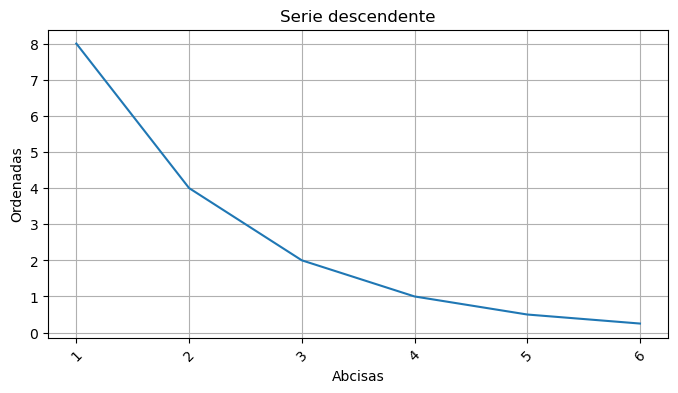

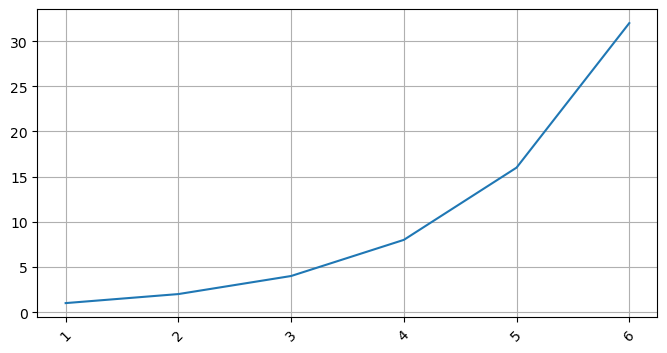

In [31]:
# Pruebas de funcionamiento:

representar_xxx_yyy([(1, 8), (2, 4), (3, 2), (4, 1), (5, 0.5), (6, 0.25)], ["Serie descendente", "Ordenadas", "Abcisas"])

representar_xxx_yyy([(1, 1), (2, 2), (3, 4), (4, 8), (5, 16), (6, 32)])

### Una gráfica concreta

Deseamos representar el número de películas de nuestra base de datos que se han producido en un intervalo de años dado.

In [233]:
# Esta celda debe ser completada por el estudiante
def	repr_movies_years(data, year1, year2):
	"""
	Crea una gráfica de línea que muestra la cantidad de películas por año dentro de un rango específico.

	Parameters
	----------
	data : dict
		Diccionario de datos de películas donde las claves son los años y los valores
		representan el número de películas lanzadas en ese año.
	year1 : int
		Año inicial del rango para filtrar los datos a representar.
	year2 : int
		Año final del rango para filtrar los datos a representar.

	Returns
	-------
	None
		La función no devuelve nada. Genera y muestra una gráfica de línea.

	Notes
	-----
	- La gráfica generada representa el número de películas lanzadas por año dentro del
	  rango especificado, con una línea en la que el eje X representa los años y el eje Y
	  la cantidad de películas.
	- Se ajusta el tamaño de la figura y se rotan las etiquetas del eje X para mayor
	  claridad.
	"""
	plt.figure(figsize=(8,4))
	plt.title("Number of movies in our database")
	plt.ylabel("num. movies in a year")
	plt.xlabel("years")
	new_dict = years_num_movies(data, year1, year2)
	num_movies_sorted = [(key, num_movies[key]) for key in sorted(new_dict.keys())]
	x_values = [x[0] for x in num_movies_sorted]
	y_values = [y[1] for y in num_movies_sorted]
	plt.plot(x_values, y_values)
	plt.xticks(range(min(x_values), max(x_values) + 1, 1))
	plt.xticks(rotation=45)
	plt.grid()
	plt.show()




ValueError: min() iterable argument is empty

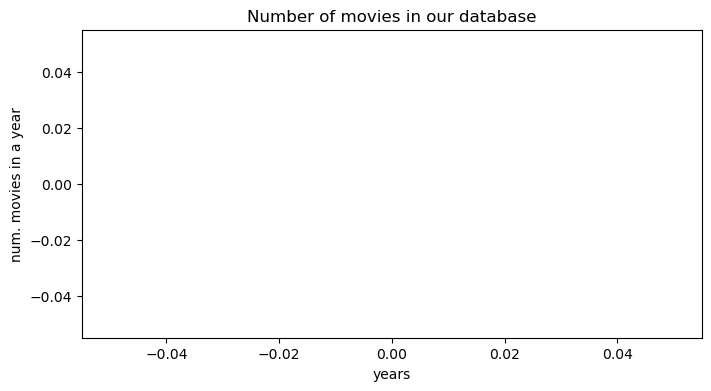

In [234]:
# Test de funcionamiento

repr_movies_years(main_dict_data, 2000, 2010)
repr_movies_years(main_dict_data, 2005, 2015)

# D. Acceso a las urls de imdb y webscraping [2 puntos]

### D.1. Recuperación de las URLs

Con sencillas instrucciones, deseamos recuperar todas las *urls* de las películas de nuestro archivo, mostrando cuántas son, la primera de ellas o las diez primeras por ejemplo:

In [ ]:
# Esta celda debe ser completada por el estudiante

# variable que guarda todos los urls en una lista
urls = [url[7] for url in main_dict_data.values()]
# variable que contiene un string formateado
first_url_movie = f"{urls[0]} ({urls[0]})"
# variable que guarda los 11 primeros valores
first_ten_urls = urls[0:10]

In [ ]:
# Test de funcionamiento

print(len(urls))

print()

print(first_url_movie)

print()

print(first_ten_urls)

4919

http://www.imdb.com/title/tt0499549/ (http://www.imdb.com/title/tt0499549/)

['http://www.imdb.com/title/tt0499549/', 'http://www.imdb.com/title/tt0449088/', 'http://www.imdb.com/title/tt2379713/', 'http://www.imdb.com/title/tt1345836/', 'http://www.imdb.com/title/tt5289954/', 'http://www.imdb.com/title/tt0401729/', 'http://www.imdb.com/title/tt0413300/', 'http://www.imdb.com/title/tt0398286/', 'http://www.imdb.com/title/tt2395427/', 'http://www.imdb.com/title/tt0417741/']


In [ ]:
# Una forma de evitar el error "Requests 403 forbidden" al hacer web scraping en las siguientes celdas:

HEADERS = {
		"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:98.0) Gecko/20100101 Firefox/98.0",
		"Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8",
		"Accept-Language": "en-US,en;q=0.5",
		"Accept-Encoding": "gzip, deflate",
		"Connection": "keep-alive",
		"Upgrade-Insecure-Requests": "1",
		"Sec-Fetch-Dest": "document",
		"Sec-Fetch-Mode": "navigate",
		"Sec-Fetch-Site": "none",
		"Sec-Fetch-User": "?1",
		"Cache-Control": "max-age=0",
	}

### D.2. Carga de la estructura sintáctica de una URL

Ahora, deseamos extraer el código `html` de una película.

In [ ]:
# Esta celda debe ser completada por el estudiante
def	soup_movie(url):
	"""
	Obtiene y analiza el contenido HTML de una página web utilizando BeautifulSoup.

	Parameters
	----------
	url : str
		URL de la página web que se desea analizar.

	Returns
	-------
	BeautifulSoup
		Un objeto BeautifulSoup que representa el documento HTML analizado.

	Notes
	-----
	- Se deshabilitan las advertencias de seguridad de urllib3 al realizar la solicitud.
	- Esta función requiere que las librerías `requests` y `BeautifulSoup` estén instaladas y
	disponibles en el entorno.
	"""
	requests.packages.urllib3.disable_warnings()
	html = requests.get(url.split(" ")[0], headers=HEADERS, verify = False).text
	return BeautifulSoup(html,"lxml")


In [ ]:
# Test de funcionamiento

soup = soup_movie(first_url_movie)

print(str(soup)[:1000])
print()
print("... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ...")
print()
print(str(soup)[-1000:])

<!DOCTYPE html>
<html lang="en-US" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/"><head><meta charset="utf-8"/><meta content="width=device-width" name="viewport"/><script>if(typeof uet === 'function'){ uet('bb', 'LoadTitle', {wb: 1}); }</script><script>window.addEventListener('load', (event) => {
        if (typeof window.csa !== 'undefined' && typeof window.csa === 'function') {
            var csaLatencyPlugin = window.csa('Content', {
                element: {
                    slotId: 'LoadTitle',
                    type: 'service-call'
                }
            });
            csaLatencyPlugin('mark', 'clickToBodyBegin', 1730314023677);
        }
    })</script><title>Avatar (2009) - IMDb</title><meta content="Avatar: Directed by James Cameron. With Sam Worthington, Zoe Saldana, Sigourney Weaver, Stephen Lang. A paraplegic Marine dispatched to the moon Pandora on a unique mission becomes torn between following his orders and pr

### D.3. Extracción de algunas piezas de información de una URL

Y ahora, con dicho código, deseamos extraer la siguiente información, referida a la película `first_url_movie`:

- La etiqueta completa del título de la película
- La descripción (sólo el contenido).
- La lista de los actores del *reparto principal*
- La información sobre el presupuesto

In [ ]:
# Esta celda debe ser completada por el estudiante

# Imprime el título del HTML
print(soup.find("title"))
print()
# Imprime la descrición del meta
print(soup.find("meta", {"name": "description"})["content"])
print()
# Crea una lista con todos los actores principales extraídos del title-cast-item_actor
print([actor.find("a", {"data-testid": "title-cast-item__actor"}).text.strip()
	   for actor in soup.find_all("div", {"data-testid": "title-cast-item"})])


<title>Avatar (2009) - IMDb</title>

Avatar: Directed by James Cameron. With Sam Worthington, Zoe Saldana, Sigourney Weaver, Stephen Lang. A paraplegic Marine dispatched to the moon Pandora on a unique mission becomes torn between following his orders and protecting the world he feels is his home.

['Sam Worthington', 'Zoe Saldana', 'Sigourney Weaver', 'Michelle Rodriguez', 'Stephen Lang', 'Giovanni Ribisi', 'Joel David Moore', 'CCH Pounder', 'Wes Studi', 'Laz Alonso', 'Dileep Rao', 'Matt Gerald', 'Sean Anthony Moran', 'Jason Whyte', 'Scott Lawrence', 'Kelly Kilgour', 'James Patrick Pitt', 'Sean Patrick Murphy']


### D.4. Actores que intervienen en una lista de URLs

Necesitamos crear un archivo con los actores del reparto principal de las películas de IMDB, dada la lista de sus URLs.

In [ ]:
# Esta celda debe ser completada por el estudiante
def	gather_actors(text, url_list):
	"""
	Extrae los nombres de actores principales de una lista de URLs y los guarda en un archivo de texto.

	Parameters
	----------
	text : str
		Nombre del archivo de texto donde se guardarán los nombres de los actores.
	url_list : list de strings
		Lista de URLs de las páginas web de las que se extraerán los nombres de actores.

	Returns
	-------
	None
		La función no devuelve nada. Escribe los nombres de los actores en el archivo de texto especificado.

	Notes
	-----
	- Cada actor principal encontrado en las páginas listadas en `url_list` se escribe en una línea
	  separada dentro del archivo especificado por `text`.
	- Utiliza `soup_movie` para obtener y analizar el contenido HTML de cada URL.
	- La estructura HTML de las páginas debe incluir un elemento con el atributo
	  `data-testid="title-cast-item__actor"` para que los nombres de los actores puedan ser
	  extraídos correctamente.
	"""
	with open(text, 'w') as f:
		for url in url_list:
			for actor in [actor.find("a", {"data-testid": "title-cast-item__actor"}).text.strip()
	   for actor in soup_movie(url).find_all("div", {"data-testid": "title-cast-item"})]:
				f.write(f"{actor}\n")


In [ ]:
# Test de funcionamiento

# OJO: esta operación puede llevar bastante tiempo.
# Para esta prueba, usamos un número limitado de películas.

gather_actors("actors_3_first_movies.txt", urls[:3])

! type actors_3_first_movies.txt

Sam Worthington
Zoe Saldana
Sigourney Weaver
Michelle Rodriguez
Stephen Lang
Giovanni Ribisi
Joel David Moore
CCH Pounder
Wes Studi
Laz Alonso
Dileep Rao
Matt Gerald
Sean Anthony Moran
Jason Whyte
Scott Lawrence
Kelly Kilgour
James Patrick Pitt
Sean Patrick Murphy
Johnny Depp
Orlando Bloom
Keira Knightley
Geoffrey Rush
Jack Davenport
Bill Nighy
Jonathan Pryce
Lee Arenberg
Mackenzie Crook
Kevin McNally
David Bailie
Stellan Skarsgård
Tom Hollander
Naomie Harris
Martin Klebba
David Schofield
Lauren Maher
Dermot Keaney
Daniel Craig
Christoph Waltz
Léa Seydoux
Ralph Fiennes
Monica Bellucci
Ben Whishaw
Naomie Harris
Dave Bautista
Andrew Scott
Rory Kinnear
Jesper Christensen
Alessandro Cremona
Stephanie Sigman
Tenoch Huerta
Adriana Paz
Domenico Fortunato
Marco Zingaro
Stefano Elfi DiClaudia


In [ ]:
# La siguente llamada llevaría un tiempo realmente largo:

#import time # para cronometrar esta función, que tarda mucho

#reloj_inicio = time.time()
#gather_actors("actors_all_movies.txt", urls)
#reloj_fin = time.time()

#print("Tiempo invertido: %s segundos." % (reloj_fin - reloj_inicio))

# E. Pandas [2 puntos]

### E.1. El primer paso es la carga del archivo en un dataframe

<font color="red">
BUSCAR MANERA DE SIMPLIFICAR
</font>

In [156]:
# Esta celda debe ser completada por el estudiante
import numpy as np
def	load_dataframe(raw_data):
	"""
	Extrae los nombres de actores principales de una lista de URLs y los guarda en un archivo de texto.

	Parameters
	----------
	raw_data: list de datos
		Lista que contiene los datos en brutos (incluyendo la cabecera y la línea de datos).

	Returns
	-------
	Tabla
		La función retorna una tabla. El encabezado (columnas) de la función se construye utilizando la primera fila, luego se rellena
		el resto de la tabla utilizando el resto de filas.
		Además, como se usa Pandas se van contabilizando del 0 a n.

	Notes
	-----
	"""
	df = pd.DataFrame(raw_data[1:], columns = raw_data[0]).replace(r"^\s*$",np.nan, regex =  True)


	for column in df.columns:
		try:
			df[column] = pd.to_numeric(df[column], downcast = "float")
		except ValueError:
			continue
	return df

In [157]:
# Test de funcionamiento

tabla_completa = load_dataframe(MOVIES_DATA)

tabla_completa

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84.0
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000.0
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16.0
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660.0


### E.2. Tabla de los campos principales

A partir de la tabla anterior, construimos otra con sólo algumos de los campos:

In [158]:
# Esta celda debe ser completada por el estudiante
def	fields_selected_dataframe(table):
	return table.copy()[["movie_title", "color", "director_name", "language", "country", "actor_1_name", "movie_imdb_link"]]

In [159]:

# test de comprobación

tabla_breve = fields_selected_dataframe(tabla_completa)

tabla_breve

,movie_title,color,director_name,language,country,actor_1_name,movie_imdb_link
0,Avatar,Color,James Cameron,English,USA,CCH Pounder,http://www.imdb.com/title/tt0499549/?ref_=fn_t...
1,Pirates of the Caribbean: At World's End,Color,Gore Verbinski,English,USA,Johnny Depp,http://www.imdb.com/title/tt0449088/?ref_=fn_t...
2,Spectre,Color,Sam Mendes,English,UK,Christoph Waltz,http://www.imdb.com/title/tt2379713/?ref_=fn_t...
3,The Dark Knight Rises,Color,Christopher Nolan,English,USA,Tom Hardy,http://www.imdb.com/title/tt1345836/?ref_=fn_t...
4,Star Wars: Episode VII - The Force Awakens ...,NaN,Doug Walker,NaN,NaN,Doug Walker,http://www.imdb.com/title/tt5289954/?ref_=fn_t...
...,...,...,...,...,...,...,...
5038,Signed Sealed Delivered,Color,Scott Smith,English,Canada,Eric Mabius,http://www.imdb.com/title/tt3000844/?ref_=fn_t...
5039,The Following,Color,NaN,English,USA,Natalie Zea,http://www.imdb.com/title/tt2071645/?ref_=fn_t...
5040,A Plague So Pleasant,Color,Benjamin Roberds,English,USA,Eva Boehnke,http://www.imdb.com/title/tt2107644/?ref_=fn_t...
5041,Shanghai Calling,Color,Daniel Hsia,English,USA,Alan Ruck,http://www.imdb.com/title/tt2070597/?ref_=fn_t...


### E.3. Columnas de una tabla

¿Cuáles son las columnas de nuestrsa `tabla_breve`?

In [160]:
# Esta celda debe ser completada por el estudiante
print(tabla_breve.columns)

Index(['movie_title', 'color', 'director_name', 'language', 'country',
       'actor_1_name', 'movie_imdb_link'],
      dtype='object')


### E.4. Campos missing

Algunos campos muestran un valor `NaN`. Deseamos cambiarlo por una cadena de caracteres: `"Desc"`.

In [163]:
# Esta celda debe ser completada por el estudiante
tabla_breve.loc[: , :] = tabla_breve.fillna("desc").replace("NaN", "desc")

In [164]:
# Test de comprobación

tabla_breve

,movie_title,color,director_name,language,country,actor_1_name,movie_imdb_link
0,Avatar,Color,James Cameron,English,USA,CCH Pounder,http://www.imdb.com/title/tt0499549/?ref_=fn_t...
1,Pirates of the Caribbean: At World's End,Color,Gore Verbinski,English,USA,Johnny Depp,http://www.imdb.com/title/tt0449088/?ref_=fn_t...
2,Spectre,Color,Sam Mendes,English,UK,Christoph Waltz,http://www.imdb.com/title/tt2379713/?ref_=fn_t...
3,The Dark Knight Rises,Color,Christopher Nolan,English,USA,Tom Hardy,http://www.imdb.com/title/tt1345836/?ref_=fn_t...
4,Star Wars: Episode VII - The Force Awakens ...,desc,Doug Walker,desc,desc,Doug Walker,http://www.imdb.com/title/tt5289954/?ref_=fn_t...
...,...,...,...,...,...,...,...
5038,Signed Sealed Delivered,Color,Scott Smith,English,Canada,Eric Mabius,http://www.imdb.com/title/tt3000844/?ref_=fn_t...
5039,The Following,Color,desc,English,USA,Natalie Zea,http://www.imdb.com/title/tt2071645/?ref_=fn_t...
5040,A Plague So Pleasant,Color,Benjamin Roberds,English,USA,Eva Boehnke,http://www.imdb.com/title/tt2107644/?ref_=fn_t...
5041,Shanghai Calling,Color,Daniel Hsia,English,USA,Alan Ruck,http://www.imdb.com/title/tt2070597/?ref_=fn_t...


### E.5. Director $\rightarrow$ películas y número de películas

Función que averigua la lista de títulos de películas de un director dado:

In [165]:
# Esta celda debe ser completada por el estudiante
def	titulos_de_director_df(table, director):
	return table.loc[table["director_name"] == director, ["movie_title"]]

In [166]:
# Test de comprobación:

tabla_tits = titulos_de_director_df(tabla_breve, "James Cameron")
tabla_tits

,movie_title
0,Avatar
26,Titanic
288,Terminator 2: Judgment Day
291,True Lies
606,The Abyss
2486,Aliens
3575,The Terminator


In [167]:
list_tits = tabla_tits["movie_title"].to_list()
print(list_tits)

['Avatar\xa0', 'Titanic\xa0', 'Terminator 2: Judgment Day\xa0', 'True Lies\xa0', 'The Abyss\xa0', 'Aliens\xa0', 'The Terminator\xa0']


Deseamos saber qué directores han dirigido el máximo número de películas, junto con ese número de películas.

In [168]:
# Esta celda debe ser completada por el estudiante
def	directors_max_movies_df(table):
	'''def directors_max_movies_df(table):
    # Count the number of movies for each director and get the top two
    director_movies = table["director_name"].value_counts().nlargest(2)

    # Get the first and second highest directors and counts
    max_director_movies = director_movies.index[0] if not director_movies.empty else None
    max_amount_movies = director_movies.iloc[0] if not director_movies.empty else 0

    # If the first is NaN, get the second highest
    if pd.isna(max_director_movies) and len(director_movies) > 1:
        max_director_movies = director_movies.index[1]
        max_amount_movies = director_movies.iloc[1]

    return [max_director_movies], max_amount_movies
'''
	"""
	Obtiene el director con el segundo mayor número de películas del DataFrame proporcionado.

	Parameters
	----------
	table : DataFrame
		Un DataFrame de pandas que contiene datos de películas, con una columna 'director_name'
		que lista los nombres de los directores para cada película.

	Returns
	-------
	list
		Una lista que contiene el nombre del director con el segundo mayor número de películas.

	int
		El número de películas dirigidas por el director con el segundo mayor conteo.

	Notes
	-----
	- La función cuenta las ocurrencias de cada director en la columna 'director_name'
	y devuelve el segundo director con mayor cantidad junto con el número de películas que ha dirigido.
	- Si hay menos de dos directores, la función devolverá None para el nombre del director
	y 0 para el número de películas.
	"""
	director_movies = table["director_name"].value_counts().nlargest(2)
	max_director_movies = director_movies.index[1]
	max_amount_movies = director_movies.iloc[1]
	return [max_director_movies],max_amount_movies



In [169]:
# test de comprobación:

directors_max_movies_df(tabla_breve)

(['Steven Spielberg'], 26)

# Parte F. Un cálculo masivo con map-reduce [0,5 puntos]

En este apartado se ha de realizar un programa aparte, *basado en la técnica de map-reduce*, que calcule, para cada idioma, en qué países en que se han producido películas y la suma de los presupuestos de dichas películas. Cuando el idioma o el país o el presupuesto no se conozcan, no se considerará esta película.

    C:\...> python language_budget_countries.py -q algunos_campos.txt

El programa funcionará necesariamente con la técnica map-reduce, que podemos poner en juego con la librería `mrjob`.

El funcionamiento del mismo se puede activar también desde aquí:

In [170]:
# Hagamos una llamada al programa de consola desde aquí:

! python language_budget_countries.py -q algunos_campos.txt

Traceback (most recent call last):
  File "c:\Users\Josed\Desktop\master_UCM\python\dorazio_deabreu_jose\movies\language_budget_countries.py", line 1, in <module>
    from mrjob.job import MRJob
ModuleNotFoundError: No module named 'mrjob'


In [171]:
# Para que el resultado se almacene en un archivo:

! python language_budget_countries.py -q algunos_campos.txt > language_countries_budgets.txt

Traceback (most recent call last):
  File "c:\Users\Josed\Desktop\master_UCM\python\dorazio_deabreu_jose\movies\language_budget_countries.py", line 1, in <module>
    from mrjob.job import MRJob
ModuleNotFoundError: No module named 'mrjob'


La siguiente celda me permite ver tu programa cómodamente desde aquí.

In [172]:
def print_file(filename):
	with open(filename, "r") as f:
		for line in f:
			print(line, end="")

print_file("language_budget_countries.py")

from mrjob.job import MRJob
from collections import defaultdict

class MRLanguagesBudgetCountries(MRJob):
	def mapper(self, _, line):
		fields = line.split('|')
		if len(fields) < 5:
			return

		language = fields[2]
		country = fields[3]
		try:
			budget = int(fields[4])
		except ValueError:
			return
		if language == "-1" or country == "-1" or budget == -1:
			return

		if language and country and budget:
			yield language, (country, budget)

	def reducer(self, language, country_budget_pairs):
		country_budget_dict = defaultdict(list)
		total_budget = 0

		for country, budget in country_budget_pairs:
			country_budget_dict[country].append(budget)
			total_budget += budget

		# Create a list of countries
		countries = list(country_budget_dict.keys())
		yield language, [countries, total_budget]

if __name__ == '__main__':
	MRLanguagesBudgetCountries.run()


# Parte G. Un apartado libre [0.5 puntos]

<br>

<font color="green">
Dejo este apartado a tu voluntad. Inventa tú mismo el enunciado y resuélvelo.
El enunciado deberá estar
<b>relacionado con el análisis de datos y con el tema de este proyecto</b>.
También, la idea es mostrar algún aspecto de programación en Python no contemplado o alguna técnica o librería que no has puesto en juego en los apartados anteriores. Concretamente, se valorará el uso de <b>la librería pandas</b>,
que hemos estudiado de un modo bastante sucinto en este módulo y tratado de forma insuficiente en este proyecto de programación,
o quizá puedes también usar alguna otra librería gráfica,
distinta de matplotlib.
    
En la evaluación, si este apartado está bien o muy bien, anota un 0,3 o 0,4. El 0,5 lo reservaremos para las situaciones en que se presente algo brillante, con alguna idea original o alguna técnica novedosa o complejidad especial o algún gráfico vistoso. Especialmente quien opta a un 9,5 o más, debe esmerarse en plantear este apartado a la altura de esa calificación.
</font>

<br>

<font color="darkblue">
Tras eliminar el párrafo anterior, en verde, sustituye éste por tu enunciado, cuya fuente aparecerá en azul oscuro.
</font>

<font color="purple">
Calcular el promedio de duración de películas por país, año y rating. 
</font>

</br>

<font color="red">

If either of the data are not found, then dont show 
</font>

In [226]:
# Este apartado debe ser completado por el estudiante
def	fields_selected_dataframe2(table):
	new_table = table.copy()[["country", "title_year", "imdb_score", "duration", "budget"]]
	return new_table
new_table = fields_selected_dataframe2(tabla_completa)
df = new_table.dropna()
df

,country,title_year,imdb_score,duration,budget
0,USA,2009.0,7.9,178.0,237000000.0
1,USA,2007.0,7.1,169.0,300000000.0
2,UK,2015.0,6.8,148.0,245000000.0
3,USA,2012.0,8.5,164.0,250000000.0
5,USA,2012.0,6.6,132.0,263700000.0
...,...,...,...,...,...
5035,USA,1992.0,6.9,81.0,7000.0
5036,USA,2005.0,7.8,84.0,3250.0
5037,USA,2011.0,6.4,95.0,9000.0
5040,USA,2013.0,6.3,76.0,1400.0


In [235]:
from statistics import mean
grouped = df.groupby(["country", "title_year", "imdb_score"])
averages = grouped[["duration", "budget"]].mean().round(0)

averages.to_csv("test.csv")

In [232]:
# Pruebas de funcionamiento, también tarea del estudiante:



# Datos personales

<br>

<font color="darkblue">

-   **Apellidos:** D'Orazio De Abreu
-   **Nombre:** José Antonio
-   **Email:** josedorazio@gmail.com
-   **Fecha:** 14.11.2024

<br>

<font color="black">
    
### Ficha de autoevaluación

<br>

<font color="green">
Aquí vienen comentarios del estudiante. Lo siguiente es un ejemplo posible obviamente ... elimina este párrafo y redacta el tuyo propio, en azul.
</font>

<br>

<font color="darkblue">
    
|Apartado|Calificación|Comentario|
|-|-|-|
|a)  |2.5  / 2.5  |Completamente resuelto |
|b)  |2.0  / 2.0  |Completamente resuelto |
|c)  |1.5  / 1.5  |Completamente resuelto |
|d)  |1 / 1.0  |Completamente resuelto |
|e)  |2.0  / 2.0  |Completamente resuelto |
|f)  |0.5  / 0.5  |Completamente resuelto |
|g)  |0.5  / 0.5  |Completamente resuelto |
|**Total** |**10** / 10.0|**Suspenso**|
</font>

<br>

<font color="black">
   
### Ayuda recibida y fuentes utilizadas
    
</font>

<br>

<font color="green">
... comentarios del estudiante ...
Pon tú este párrafo con tus propias observaciones. Elimina este párrafo en verde.
</font>

<br>

<font color="black">
    
### Comentario adicional

</font>

<br>

<font color="green">
... Este apartado es optativo. Si lo completas, ponlo en azul; si no, suprímelo con su título.

<br>

In [ ]:
# Esta celda se ha de respetar: está aquí para comprobar
# el funcionamiento de algunas funciones por parte de tu profesor
